<a href="https://colab.research.google.com/github/bel4life/Boston-Housing-Project/blob/master/Keras_Linear_Regression_Housing%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neural Networks For Regression Using KERAS**

**1. Reading Data**

In [0]:
import pandas as pd


In [0]:
BHNames=['crim','zn','indus','chas','nox','rn','age','dis','rad','tax','ptratio','black','lstat','medv']

In [0]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'

In [0]:
data =pd.read_csv(url, delim_whitespace=True, names=BHNames)

**2. Exploratory Analysis**

In [0]:
print(data.head(20))

       crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0   0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1   0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2   0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3   0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4   0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
5   0.02985   0.0   2.18     0  0.458  ...  222.0     18.7  394.12   5.21  28.7
6   0.08829  12.5   7.87     0  0.524  ...  311.0     15.2  395.60  12.43  22.9
7   0.14455  12.5   7.87     0  0.524  ...  311.0     15.2  396.90  19.15  27.1
8   0.21124  12.5   7.87     0  0.524  ...  311.0     15.2  386.63  29.93  16.5
9   0.17004  12.5   7.87     0  0.524  ...  311.0     15.2  386.71  17.10  18.9
10  0.22489  12.5   7.87     0  0.524  ...  311.0     15.2  392.52  20.45  15.0
11  0.11747  12.5   7.87     0  0.524  .

In [0]:
print(data.head())

      crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


In [0]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rn         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null float64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB
None


In [0]:
summary=(data.describe())
summary=(summary.transpose())
print(summary)

         count        mean         std  ...        50%         75%       max
crim     506.0    3.613524    8.601545  ...    0.25651    3.677082   88.9762
zn       506.0   11.363636   23.322453  ...    0.00000   12.500000  100.0000
indus    506.0   11.136779    6.860353  ...    9.69000   18.100000   27.7400
chas     506.0    0.069170    0.253994  ...    0.00000    0.000000    1.0000
nox      506.0    0.554695    0.115878  ...    0.53800    0.624000    0.8710
rn       506.0    6.284634    0.702617  ...    6.20850    6.623500    8.7800
age      506.0   68.574901   28.148861  ...   77.50000   94.075000  100.0000
dis      506.0    3.795043    2.105710  ...    3.20745    5.188425   12.1265
rad      506.0    9.549407    8.707259  ...    5.00000   24.000000   24.0000
tax      506.0  408.237154  168.537116  ...  330.00000  666.000000  711.0000
ptratio  506.0   18.455534    2.164946  ...   19.05000   20.200000   22.0000
black    506.0  356.674032   91.294864  ...  391.44000  396.225000  396.9000

**3. Data Scaler**

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
print(scaler.fit(data))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [0]:
DataScaled = scaler.fit_transform(data)

In [0]:
DataScaled = pd.DataFrame(DataScaled, columns = BHNames)

In [0]:
summary = DataScaled.describe()
summary=(summary.transpose())
print(summary)


         count      mean       std  min       25%       50%       75%  max
crim     506.0  0.040544  0.096679  0.0  0.000851  0.002812  0.041258  1.0
zn       506.0  0.113636  0.233225  0.0  0.000000  0.000000  0.125000  1.0
indus    506.0  0.391378  0.251479  0.0  0.173387  0.338343  0.646628  1.0
chas     506.0  0.069170  0.253994  0.0  0.000000  0.000000  0.000000  1.0
nox      506.0  0.349167  0.238431  0.0  0.131687  0.314815  0.491770  1.0
rn       506.0  0.521869  0.134627  0.0  0.445392  0.507281  0.586798  1.0
age      506.0  0.676364  0.289896  0.0  0.433831  0.768280  0.938980  1.0
dis      506.0  0.242381  0.191482  0.0  0.088259  0.188949  0.369088  1.0
rad      506.0  0.371713  0.378576  0.0  0.130435  0.173913  1.000000  1.0
tax      506.0  0.422208  0.321636  0.0  0.175573  0.272901  0.914122  1.0
ptratio  506.0  0.622929  0.230313  0.0  0.510638  0.686170  0.808511  1.0
black    506.0  0.898568  0.230205  0.0  0.945730  0.986232  0.998298  1.0
lstat    506.0  0.301409 

**4. Data Visualisation**

In [0]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

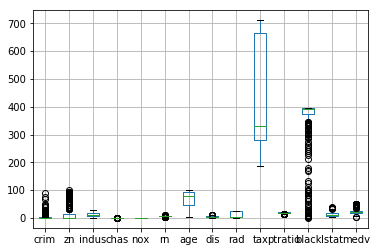

In [0]:
boxplot = data.boxplot(column=BHNames)
plt.show

In [0]:
CorData = DataScaled.corr(method='pearson')

In [0]:
with pd.option_context ('display.max_rows', None, 
                        'display.max_columns', CorData.shape[1] ):
  print(CorData)


             crim        zn     indus      chas       nox        rn       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rn      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 

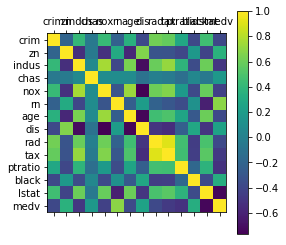

In [0]:
plt.matshow(CorData)
plt.xticks(range(len(CorData.columns)), CorData.columns)
plt.yticks(range(len(CorData.columns)), CorData.columns)
plt.colorbar()
plt.show()

**5. Data Split**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = DataScaled.drop ('medv',axis =1)
print(X.describe())

Y = DataScaled['medv']
print(Y.describe())

             crim          zn       indus  ...     ptratio       black       lstat
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     0.040544    0.113636    0.391378  ...    0.622929    0.898568    0.301409
std      0.096679    0.233225    0.251479  ...    0.230313    0.230205    0.197049
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      0.000851    0.000000    0.173387  ...    0.510638    0.945730    0.144040
50%      0.002812    0.000000    0.338343  ...    0.686170    0.986232    0.265728
75%      0.041258    0.125000    0.646628  ...    0.808511    0.998298    0.420116
max      1.000000    1.000000    1.000000  ...    1.000000    1.000000    1.000000

[8 rows x 13 columns]
count    506.000000
mean       0.389618
std        0.204380
min        0.000000
25%        0.267222
50%        0.360000
75%        0.444444
max        1.000000
Name: medv, dtype: float64


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30, random_state = 5)

print('X train shape = ', X_train.shape)
print('X test shape = ', X_test.shape)
print('Y train shape = ', Y_train.shape)
print('Y train shape = ', Y_train.shape)



X train shape =  (354, 13)
X test shape =  (152, 13)
Y train shape =  (354,)
Y train shape =  (354,)


**Neural Network Keras Model**

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics


Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(20, input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))



Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer ='adam', loss='mean_squared_error',
             metrics=['accuracy'])

In [0]:
model.fit (X_train, Y_train, epochs=1000, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
354/354 [==============================] - 1s 2ms/step - loss: 0.1902 - acc: 0.0056
Epoch 2/1000
354/354 [==============================] - 0s 55us/step - loss: 0.0616 - acc: 0.0056
Epoch 3/1000
354/354 [==============================] - 0s 50us/step - loss: 0.0369 - acc: 0.0085
Epoch 4/1000
354/354 [==============================] - 0s 46us/step - loss: 0.0326 - acc: 0.0169
Epoch 5/1000
354/354 [==============================] - 0s 51us/step - loss: 0.0279 - acc: 0.0169
Epoch 6/1000
354/354 [==============================] - 0s 51us/step - loss: 0.0249 - acc: 0.0169
Epoch 7/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0228 - acc: 0.0169
Epoch 8/1000
354/354 [==============================] - 0s 44us/step - loss: 0.0213 - acc: 0.0226
Epoch 9/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0200 - acc: 0.0226
Epoch 10/1000
354/354 [==============================] - 0s 50us/step -

In [0]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [0]:
Y_predKM = model.predict(X_test)

In [0]:
score = model.evaluate (X_test, Y_test, verbose=0)
print('Keras Model')
print(score[0])
                    

Keras Model
0.00828167090290471


**Multiple Linear Model from SKLearn - Comparison**

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
LModel=LinearRegression()


In [0]:
LModel.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Y_predLM = LModel.predict(X_test)

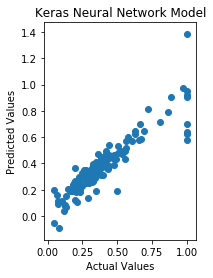

In [0]:


plt.figure(1)

plt.subplot(121)
plt.scatter(Y_test, Y_predKM)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Keras Neural Network Model')
plt.show()



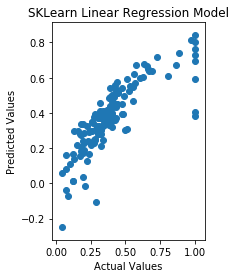

In [0]:
plt.subplot(121)
plt.scatter(Y_test, Y_predLM)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SKLearn Linear Regression Model')
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
mse=mean_squared_error(Y_test,Y_predLM)
print('Linear Regression Model')
print(mse)

Linear Regression Model
0.015159030964982022
